# **Data Transformation**

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [ ]:
# Leemos el dataset después del EDA
ubicacion_drive = '/content/drive/MyDrive/6672_Business Predictive Analytics_TF_Grupo 5/FuentesDatos'
df_eda = pd.read_pickle(f'{ubicacion_drive}/df_eda.pickle')

In [ ]:
df_eda.shape

(43800, 10)

## **Feature Engineering**

In [ ]:
# Separar predictoras del target
X = df_eda.drop(columns='DTC')
y = df_eda['DTC']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.8,
    random_state=42,
    stratify=y  # mantiene proporciones del target
)

## **Reescaling**

In [ ]:
# Escalado de las columnas predictoras
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Convertimos nuevamente a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled, columns=X.columns)

# Guardamos el escalador para usarlo en producción (Streamlit)
import joblib
joblib.dump(scaler, f'{ubicacion_drive}/scaler_robust.sav')

['/content/drive/MyDrive/6672_Business Predictive Analytics_TP_Grupo 5/FuentesDatos/scaler_robust.sav']

In [ ]:
# Dataset de variables predictivas antes de escalado
X_train.head()

,SOC,SOH,charging_cycles,battery_temp,motor_rpm,motor_torque,motor_temp,brake_pad_wear,tire_pressure
15309,47.162471,89.703228,187,32.640461,0.000000,0.000000,71.412873,81.339696,30.550202
22034,51.975955,98.109483,63,31.351128,0.000000,0.000000,68.888260,41.638084,28.163788
714,31.960576,99.735926,9,34.214185,0.000000,0.000000,68.860714,95.840253,26.152689
26315,39.403720,96.539084,8,29.469874,1542.877725,308.575545,66.839444,87.250138,30.785439
36317,47.990618,92.865085,130,28.870058,0.000000,0.000000,70.847721,30.163235,31.769394


In [ ]:
# Dataset de variables predictivas después del escalado
X_train_scaled.head()

,SOC,SOH,charging_cycles,battery_temp,motor_rpm,motor_torque,motor_temp,brake_pad_wear,tire_pressure
0,-0.328716,-0.688442,1.189474,0.112685,0.000000,0.000000,0.110427,0.393811,0.579443
1,-0.208681,0.782741,-0.115789,-0.023859,0.000000,0.000000,-0.357422,-0.791127,-0.095065
2,-0.707809,1.067385,-0.684211,0.279346,0.000000,0.000000,-0.362527,0.826596,-0.663492
3,-0.522197,0.507904,-0.694737,-0.223088,1.006489,1.006489,-0.737099,0.570215,0.645932
4,-0.308064,-0.135084,0.589474,-0.286610,0.000000,0.000000,0.005696,-1.133606,0.924042


## **Imbalanced Data**

In [ ]:
# Balanceo con SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

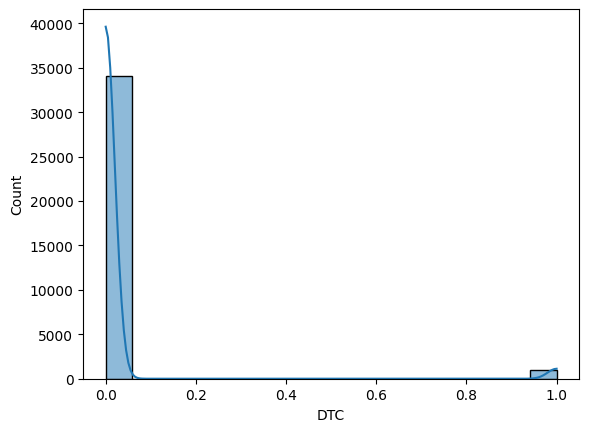

In [ ]:
# Visualización del target antes del balanceo
sns.histplot(y_train, kde=True);

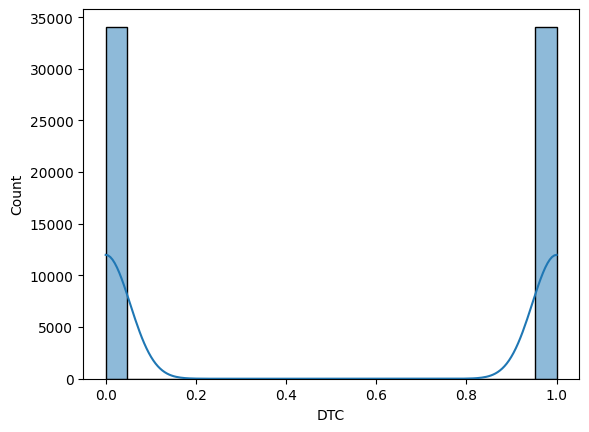

In [ ]:
# Visualización del target después del balanceo
sns.histplot(y_train_bal, kde=True);

In [ ]:
# Creamos una dataframe comparando el target antes y después del balanceo SMOTE para mejor visualización
df_comparando_dtc = pd.DataFrame({
    "DTC sin balanceo": y_train.value_counts(),
    "DTC con balanceo": y_train_bal.value_counts()
})
df_comparando_dtc

,DTC sin balanceo,DTC con balanceo
DTC,,
0,34075,34075
1,965,34075


In [ ]:
# Guardamos la data transformada
df_transformado = {
    "X_train": X_train_bal,
    "y_train": y_train_bal,
    "X_test": X_test_scaled,
    "y_test": y_test
}

df_final = {
    "train": pd.concat([X_train_bal, y_train_bal], axis=1),
    "test": pd.concat([X_test_scaled, y_test], axis=1)
}

pd.to_pickle(df_transformado, f'{ubicacion_drive}/df_transformado.pickle')